In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from skimage.io import imread
from skimage.transform import resize

In [10]:
# Path dataset
dataset_path = "uang/asli"  # Folder hanya berisi gambar uang asli

# Dimensi gambar
img_height, img_width = 128, 128

# Data
data = []

# Membaca gambar dari folder
for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)
    try:
        # Membaca dan mengubah ukuran gambar
        img = imread(img_path)
        img_resized = resize(img, (img_height, img_width), anti_aliasing=True)
        data.append(img_resized.flatten())
    except Exception as e:
        print(f"Gagal memproses gambar {img_name}: {e}")

# Mengubah data menjadi array numpy
data = np.array(data)

In [11]:
# Membuat model One-Class SVM
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
model.fit(data)

OneClassSVM(gamma=0.001, nu=0.05)

In [12]:
# Evaluasi dengan data asli (harus terdeteksi sebagai inlier)
y_true = np.ones(len(data))  # Semua data asli diberi label 1
y_pred = model.predict(data)  # -1 untuk outlier, 1 untuk inlier
y_pred = np.where(y_pred == 1, 1, 0)  # Ubah prediksi menjadi 1 (asli) dan 0 (palsu)


In [13]:
# Simulasi dengan data palsu (contoh: gambar acak atau noise)
# Create fake data with the correct dimensions (128x128x3)
fake_data = np.random.rand(10, img_height, img_width, 3)
# Flatten the fake data to match the training data format
fake_data = fake_data.reshape(10, img_height * img_width * 3)
y_fake_true = np.zeros(10)  # Semua data palsu diberi label 0
y_fake_pred = model.predict(fake_data)
y_fake_pred = np.where(y_fake_pred == 1, 1, 0)

# Gabungkan hasil evaluasi asli dan palsu
y_combined_true = np.concatenate([y_true, y_fake_true])
y_combined_pred = np.concatenate([y_pred, y_fake_pred])

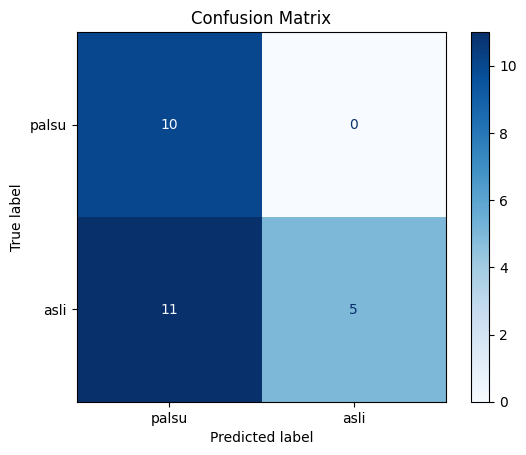

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_combined_true, y_combined_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["palsu", "asli"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Laporan Klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_combined_true, y_combined_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65        10
         1.0       1.00      0.31      0.48        16

    accuracy                           0.58        26
   macro avg       0.74      0.66      0.56        26
weighted avg       0.80      0.58      0.54        26



<ipython-input-16-bd5fff63c8c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_combined_pred, palette="pastel")


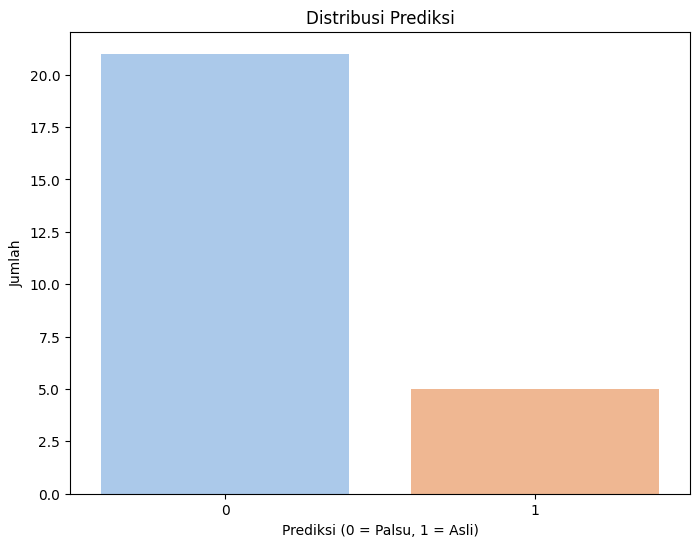

In [16]:
# Visualisasi Distribusi Prediksi
plt.figure(figsize=(8, 6))
sns.countplot(x=y_combined_pred, palette="pastel")
plt.title("Distribusi Prediksi")
plt.xlabel("Prediksi (0 = Palsu, 1 = Asli)")
plt.ylabel("Jumlah")
plt.show()


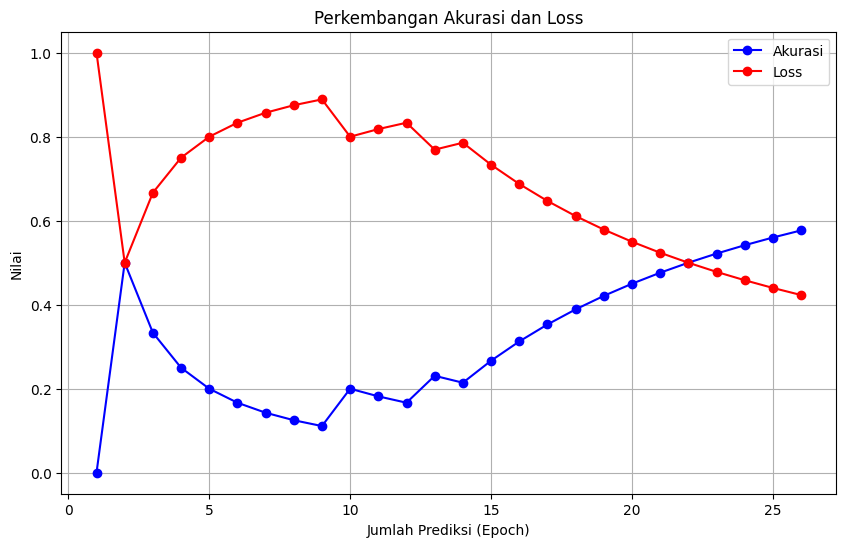

In [17]:
# Simulasi nilai akurasi dan loss
epochs = range(1, len(y_combined_true) + 1)  # Setiap prediksi dianggap sebagai satu epoch
accuracies = [np.mean(y_combined_true[:i] == y_combined_pred[:i]) for i in epochs]
losses = [1 - acc for acc in accuracies]

# Plot Akurasi dan Loss
plt.figure(figsize=(10, 6))

# Akurasi
plt.plot(epochs, accuracies, label="Akurasi", marker="o", color="blue")

# Loss
plt.plot(epochs, losses, label="Loss", marker="o", color="red")

plt.title("Perkembangan Akurasi dan Loss")
plt.xlabel("Jumlah Prediksi (Epoch)")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import joblib

# Simpan model ke file
joblib.dump(model, "model_uang_asli.pkl")
print("Model berhasil disimpan!")


Model berhasil disimpan!
